<a href="https://colab.research.google.com/github/yadukul/ML-Lab/blob/main/Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np

#Loading dataset from an Excel file
data = pd.read_excel("/content/Lab4_dataset.xlsx", sheet_name="Sheet1")
df = pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [24]:
import math

total_instances = len(data)

num_yes = len(data[data['buys_computer'] == 'yes'])
num_no = len(data[data['buys_computer'] == 'no'])
p_yes = num_yes / total_instances
p_no = num_no / total_instances

entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)

print(f"Entropy: {entropy:.2f}")


Entropy: 0.94


In [30]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming 'data' is your DataFrame with columns: Age, Income, Student, Credit Rating, Buys Computer

# Perform one-hot encoding for categorical attributes
data_encoded = pd.get_dummies(data, columns=['age', 'income', 'student', 'credit_rating', 'buys_computer'])

# Separate your features (X) and target (y)
X = data_encoded.drop(columns=['buys_computer_yes', 'buys_computer_no'])
y = data_encoded['buys_computer_yes']  # You can choose 'Buys Computer_No' as the target if you want to predict non-buyers

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Calculate and print the training set accuracy
train_accuracy = model.score(X, y)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")


Training Set Accuracy: 1.00
Tree Depth: 4


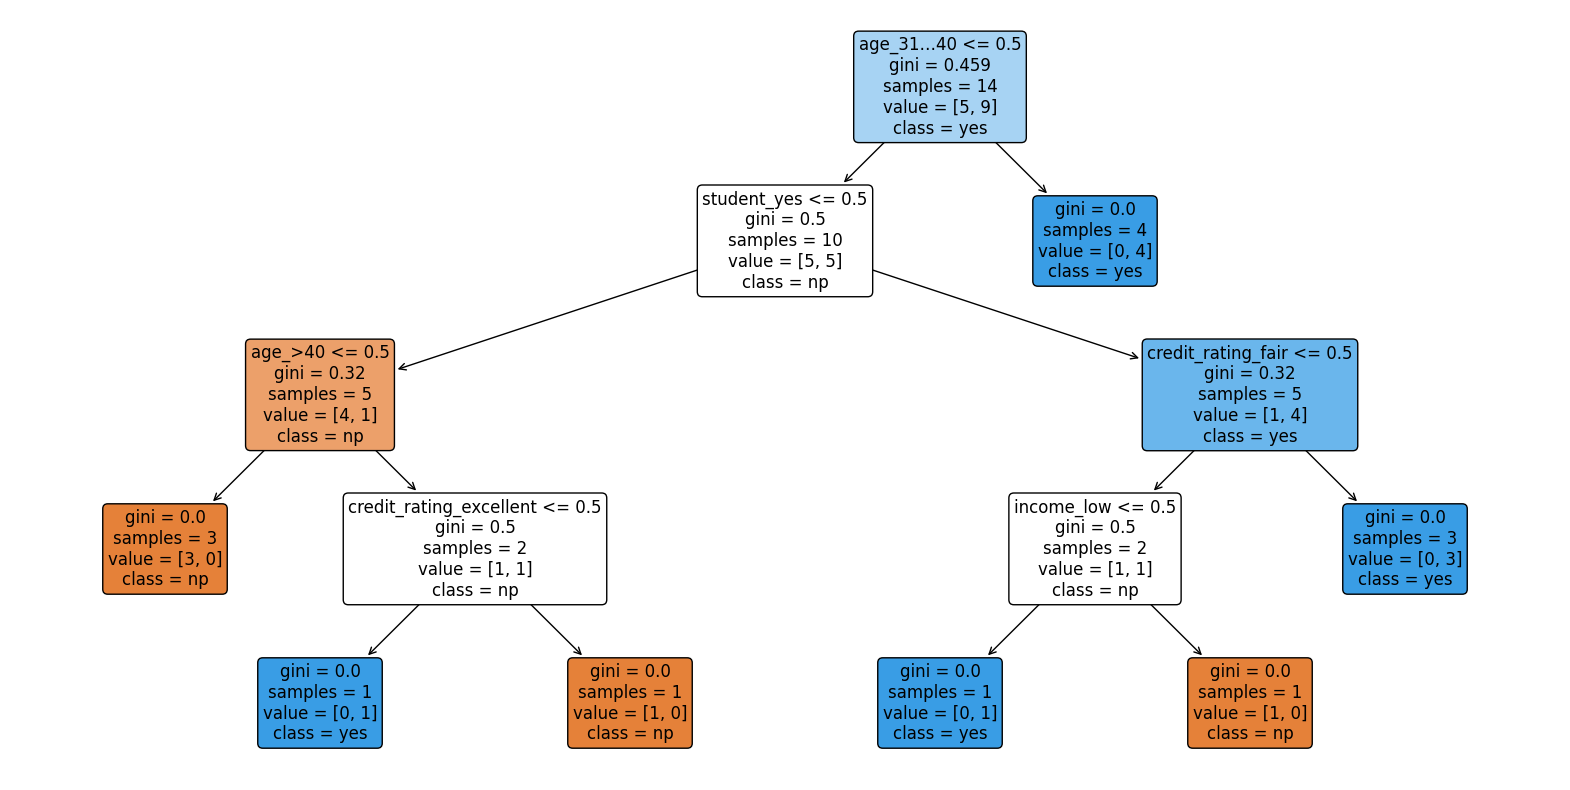

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you already have the 'model' variable containing the trained DecisionTreeClassifier

plt.figure(figsize=(20, 10))  # Adjust the figsize as needed
plot_tree(model, filled=True, feature_names=X.columns, class_names=['np', 'yes'], rounded=True, fontsize=12)
plt.show()


Training Set Accuracy: 1.00
Test Set Accuracy: 1.00


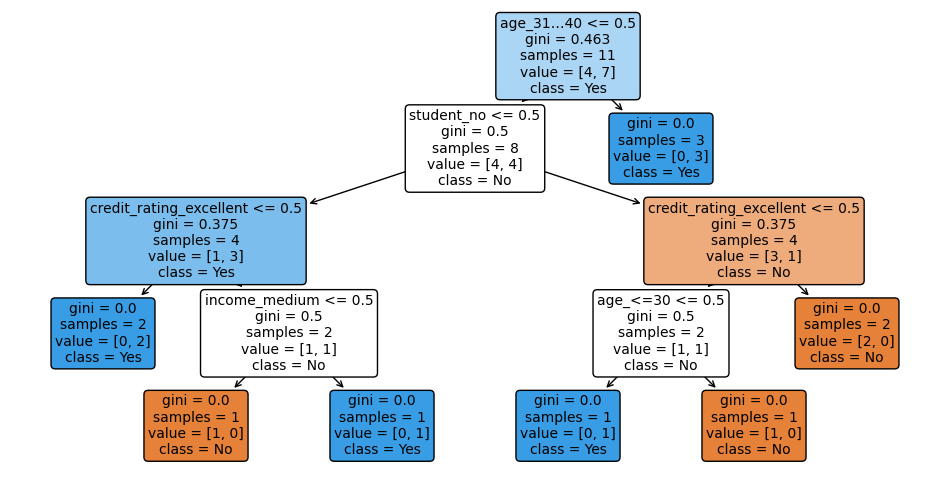

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data_encoded = pd.get_dummies(data.drop(columns=['buys_computer']))

# Define your features (X) and target (y)
X = data_encoded
y = data['buys_computer']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate and print the training set accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Calculate and print the test set accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.show()

Training Set Accuracy (Entropy Criterion): 1.00
Test Set Accuracy (Entropy Criterion): 1.00


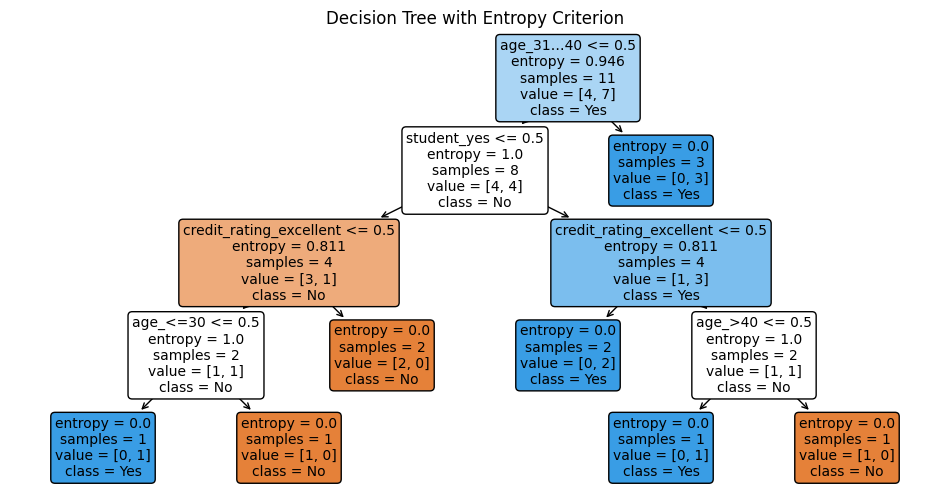

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data.drop(columns=['buys_computer']))

# Define your features (X) and target (y)
X = data_encoded
y = data['buys_computer']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model with "Entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)

# Calculate and print the training set accuracy with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(X_train, y_train)
print(f"Training Set Accuracy (Entropy Criterion): {train_accuracy_entropy:.2f}")

# Calculate and print the test set accuracy with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(X_test, y_test)
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy_entropy:.2f}")

# Visualize the Decision Tree with "Entropy" criterion
plt.figure(figsize=(12, 6))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Perform one-hot encoding to convert categorical data into numerical
data_encoded = pd.get_dummies(data.drop(columns=['buys_computer']))

# Define your features (X) and target (y)
X = data_encoded
y = data['buys_computer']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluate Decision Tree performance
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Evaluate Random Forest performance
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Compare performance metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")
print(f"ROC AUC: {roc_auc_dt:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")


ValueError: ignored